#Conhecimento dos dados

###Importando biblioteca Pandas

In [109]:
import pandas as pd

###Ignorando futuras mensagens de "Warning" que não impedem o funcionamento do código

In [110]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

###Leitura dos arquivos 

In [111]:
excel = pd.ExcelFile('B4 Bank Data.xlsx')
df1 = pd.read_excel(excel, 'Reviews_Bank')
df2 = pd.read_excel(excel, 'Retained_Bank')

#Análise do DataFrame Retained_Bank


In [112]:
df2

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,2019-08-01 00:00:00,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652
2,2019-08-01 00:00:00,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
4,2019-08-02 00:00:00,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1000.000,10,1000.000,9,0.900,8,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2019-10-29 00:00:00,B4 Bank,Other,55,12,0.218,7,0.583,6,0.500,6,0.500,6,0.500
313,2019-10-30 00:00:00,B4 Bank,Organic,2457,545,0.222,437,0.802,402,0.738,386,0.708,374,0.686
314,2019-10-30 00:00:00,B4 Bank,Tracked channels (UTM),207,15,0.072,8,0.533,6,0.400,6,0.400,6,0.400
315,2019-10-30 00:00:00,B4 Bank,Third-party referrers,2625,207,0.079,123,0.594,104,0.502,96,0.464,83,0.401


In [113]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  317 non-null    object 
 1   Package Name                          317 non-null    object 
 2   Acquisition Channel                   317 non-null    object 
 3   Store Listing Visitors                317 non-null    int64  
 4   Installers                            317 non-null    int64  
 5   Visitor-to-Installer conversion rate  317 non-null    float64
 6   Installers retained for 1 day         317 non-null    int64  
 7   Installer-to-1 day retention rate     317 non-null    float64
 8   Installers retained for 7 days        317 non-null    int64  
 9   Installer-to-7 days retention rate    317 non-null    float64
 10  Installers retained for 15 days       317 non-null    int64  
 11  Installer-to-15 day

###Tratamento de dados incorretos no arquivo

In [114]:
tratar_valor_1000 = {1000 : 1}
df2[['Installer-to-1 day retention rate','Installer-to-7 days retention rate','Installer-to-15 days retention rate','Installer-to-30 days retention rate']] = df2[['Installer-to-1 day retention rate','Installer-to-7 days retention rate','Installer-to-15 days retention rate','Installer-to-30 days retention rate']].replace(tratar_valor_1000)
df2

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
1,2019-08-01 00:00:00,B4 Bank,Third-party referrers,514,46,0.089,38,0.826,35,0.761,32,0.696,30,0.652
2,2019-08-01 00:00:00,B4 Bank,Other,113,23,0.204,17,0.739,17,0.739,14,0.609,13,0.565
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
4,2019-08-02 00:00:00,B4 Bank,Tracked channels (UTM),55,10,0.182,10,1.000,10,1.000,9,0.900,8,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2019-10-29 00:00:00,B4 Bank,Other,55,12,0.218,7,0.583,6,0.500,6,0.500,6,0.500
313,2019-10-30 00:00:00,B4 Bank,Organic,2457,545,0.222,437,0.802,402,0.738,386,0.708,374,0.686
314,2019-10-30 00:00:00,B4 Bank,Tracked channels (UTM),207,15,0.072,8,0.533,6,0.400,6,0.400,6,0.400
315,2019-10-30 00:00:00,B4 Bank,Third-party referrers,2625,207,0.079,123,0.594,104,0.502,96,0.464,83,0.401


###Criação e exportação de DataFrame com os canais de aquisição como index

In [115]:
df2_canal_aquisicao = df2.groupby('Acquisition Channel')

In [116]:
usuarios_por_canal = df2_canal_aquisicao['Store Listing Visitors','Installers'].sum()
usuarios_por_canal

,Store Listing Visitors,Installers
Acquisition Channel,,
Organic,185449,33981
Other,6242,1181
Third-party referrers,109365,9806
Tracked channels (UTM),29005,642


In [117]:
conversao_por_canal = df2_canal_aquisicao['Visitor-to-Installer conversion rate'].mean()
conversao_por_canal

Acquisition Channel
Organic                   0.200804
Other                     0.190337
Third-party referrers     0.109372
Tracked channels (UTM)    0.045851
Name: Visitor-to-Installer conversion rate, dtype: float64

In [118]:
retencao_15_dias = df2_canal_aquisicao['Installers retained for 15 days'].sum()
retencao_15_dias

Acquisition Channel
Organic                   28091
Other                       971
Third-party referrers      5228
Tracked channels (UTM)      426
Name: Installers retained for 15 days, dtype: int64

In [119]:
porcentagem_retencao_15_dias = df2_canal_aquisicao['Installer-to-15 days retention rate'].mean()
porcentagem_retencao_15_dias

Acquisition Channel
Organic                   0.820978
Other                     0.827050
Third-party referrers     0.603462
Tracked channels (UTM)    0.673388
Name: Installer-to-15 days retention rate, dtype: float64

In [120]:
retencao_30_dias = df2_canal_aquisicao['Installers retained for 30 days'].sum()
retencao_30_dias

Acquisition Channel
Organic                   27323
Other                       925
Third-party referrers      4668
Tracked channels (UTM)      398
Name: Installers retained for 30 days, dtype: int64

In [121]:
porcentagem_retencao_30_dias = df2_canal_aquisicao['Installer-to-30 days retention rate'].mean()
porcentagem_retencao_30_dias

Acquisition Channel
Organic                   0.798141
Other                     0.789675
Third-party referrers     0.555064
Tracked channels (UTM)    0.632657
Name: Installer-to-30 days retention rate, dtype: float64

In [122]:
df2_por_canal = pd.concat([usuarios_por_canal, conversao_por_canal, retencao_15_dias, porcentagem_retencao_15_dias, retencao_30_dias, porcentagem_retencao_30_dias], axis = 1)
df2_por_canal

,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
Acquisition Channel,,,,,,,
Organic,185449,33981,0.200804,28091,0.820978,27323,0.798141
Other,6242,1181,0.190337,971,0.827050,925,0.789675
Third-party referrers,109365,9806,0.109372,5228,0.603462,4668,0.555064
Tracked channels (UTM),29005,642,0.045851,426,0.673388,398,0.632657


In [123]:
df2_por_canal.to_excel('informacoes_por_canal.xlsx', sheet_name='banco_retencao')

###Exploração da quantidade total de instalações pelo canal Orgânico

In [124]:
instalacoes_organico = df2['Installers'][df2['Acquisition Channel'] == 'Organic'].sum()
instalacoes_organico

33981

In [125]:
instalacoes_total = df2['Installers'].sum()
instalacoes_total

45610

###Exploração da quantidade de dias constados no DataFrame

In [126]:
quantidade_de_dias = len(df2['Installers'][df2['Acquisition Channel'] == 'Organic'])
quantidade_de_dias

92

In [127]:
porcentagem_instalacoes_organico = (instalacoes_organico / instalacoes_total) * 100
print("A porcentagem de instalações via canal de aquisição 'Orgânico' é de {0:.2f}%".format(porcentagem_instalacoes_organico))

A porcentagem de instalações via canal de aquisição 'Orgânico' é de 74.50%


###Análise da quantidade de retenção e instalação do canal Orgânico

In [128]:
porcentagem_retencao_15_dias_organico = (df2['Installer-to-15 days retention rate'][df2['Acquisition Channel'] == 'Organic']).mean() * 100
porcentagem_retencao_30_dias_organico = (df2['Installer-to-30 days retention rate'][df2['Acquisition Channel'] == 'Organic']).mean() * 100
print("A porcentagem de retenção de 15 e 30 dias das instalações via canal de aquisição 'Orgânico' é, respectivamente, de {0:.2f}% e de {1:.2f}%".format(porcentagem_retencao_15_dias_organico, porcentagem_retencao_30_dias_organico))

A porcentagem de retenção de 15 e 30 dias das instalações via canal de aquisição 'Orgânico' é, respectivamente, de 82.10% e de 79.81%


In [129]:
media_instalacoes_por_dia_organico = (instalacoes_total / quantidade_de_dias) * (porcentagem_instalacoes_organico/100)
media_instalacoes_por_dia_organico.round()

369.0

###Exemplo de problema a ser resolvido pela Distribuição de Poisson, para o cálculo da probabilidade do aplicativo ser instalado a quantidade X vezes

O aplicativo B4 Bank recebe em média **369 instalações por dia** via canal Orgânico. Qual a probabilidade de que, em determinado dia escolhido ao acaso, o aplicativo seja **instalado 350 vezes** organicamente?

In [130]:
from scipy.stats import poisson
k = 350
media = 369
probabilidade = poisson.pmf(k, media) * 100
print("A probabilidade de que, em determinado dia escolhido ao acaso, o aplicativo seja instalado 350 vezes organicamente é de %0.8f%%" % probabilidade)

A probabilidade de que, em determinado dia escolhido ao acaso, o aplicativo seja instalado 350 vezes organicamente é de 1.29595558%


#Análise do DataFrame Reviews_Bank




In [131]:
df1

,Package Name,App Version Name,Reviewer Language,Device,Review Last Update Date and Time,Star Rating,Review Title,Review Text,Sentiment
0,B4 Bank,6.10.6,pt,greatlte,2019-10-01T00:09:07Z,5,NaN,NaN,Positive
1,B4 Bank,6.10.6,pt,mido,2019-10-01T00:18:49Z,5,NaN,NaN,Positive
2,B4 Bank,6.10.6,pt,on5xelte,2019-10-01T00:34:35Z,5,NaN,Boa,Positive
3,B4 Bank,6.10.6,pt,dreamlte,2019-10-01T00:44:18Z,2,NaN,"Não consigo gerar a fatura em PDF, no mesmo fo...",Negative
4,B4 Bank,6.10.6,pt,starqltechn,2019-10-01T01:09:56Z,4,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...
5674,B4 Bank,6.10.5,pt,hlte,2019-08-31T21:51:26Z,1,NaN,"Baixei a última versão recentemente, ainda não...",NaN
5675,B4 Bank,6.10.5,pt,potter_nt,2019-08-31T22:36:38Z,4,NaN,NaN,NaN
5676,B4 Bank,4.1.7,pt,j4primelte,2019-08-31T22:44:22Z,5,NaN,NaN,NaN
5677,B4 Bank,6.10.5,pt,K10a40,2019-08-31T23:39:14Z,5,NaN,"Gostei muito prático, descomplicado",NaN


In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5679 entries, 0 to 5678
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Package Name                      5679 non-null   object
 1   App Version Name                  5423 non-null   object
 2   Reviewer Language                 5679 non-null   object
 3   Device                            5673 non-null   object
 4   Review Last Update Date and Time  5679 non-null   object
 5   Star Rating                       5679 non-null   int64 
 6   Review Title                      1 non-null      object
 7   Review Text                       2756 non-null   object
 8   Sentiment                         1428 non-null   object
dtypes: int64(1), object(8)
memory usage: 399.4+ KB


###Análise das avaliações atribuídas

In [133]:
avaliacoes_positivas = df1['Sentiment'] == 'Positive'
avaliacoes_positivas = avaliacoes_positivas.values.sum()
avaliacoes_positivas

1236

In [134]:
porcentagem_positiva = avaliacoes_positivas / df1['Sentiment'].notnull().sum()
porcentagem_positiva = porcentagem_positiva * 100
print('A porcentagem de avaliações positivas foram {0:.2f}%.'.format(porcentagem_positiva))

A porcentagem de avaliações positivas foram 86.55%.


In [135]:
media_rating = df1['Star Rating'].mean()
print('A média dos ratings é {0:.2f}.'.format(media_rating))

A média dos ratings é 4.40.


In [136]:
moda_rating = df1['Star Rating'].mode()[0]
print('O rating mais utilizado nas avaliações é {0:.1f}.'.format(moda_rating))

O rating mais utilizado nas avaliações é 5.0.


In [137]:
mediana_rating = df1['Star Rating'].median()
print('O rating que separa a metade menor da metade maior da população é {0:.1f}.'.format(mediana_rating))

O rating que separa a metade menor da metade maior da população é 5.0.


####Considerando a Escala de Satisfação do Cliente (CSAT) que varia de 1 a 5, a qual classifica:
####1 - Muito Insatisfeito, 2 - Insatisfeito, 3 - Indiferente, 4 - Satisfeito, 5 - Muito Satisfeito.

In [138]:
porcentagem_usuarios_satisfeitos = ((df1['Star Rating'] >= 4).sum() / len(df1['Star Rating'])) * 100 
print('A porcentagem de usuários satisfeitos (nota maior ou igual a 4) com o aplicativo é de {0:.0f}%.'.format(porcentagem_usuarios_satisfeitos))

A porcentagem de usuários satisfeitos (nota maior ou igual a 4) com o aplicativo é de 86%.


###Criação de DataFrame da quantidade de usuários e rating médio pelo versão do aplicativo

####Troca do nome "0" da segunda coluna do DataFrame pelo nome "Quantidade_de_usuarios"

In [139]:
satisfacao_por_versao_app = pd.concat([df1.groupby('App Version Name').size(), df1.groupby('App Version Name').mean()], axis = 1)
satisfacao_por_versao_app.rename(columns={0: 'Quantidade_de_usuarios'}, inplace = True)
satisfacao_por_versao_app

,Quantidade_de_usuarios,Star Rating
App Version Name,,
4.1.14,1,5.000000
4.1.17,1,3.000000
4.1.7,2,5.000000
4.1.8,1,5.000000
5.0.7,1,4.000000
5.3.1,1,5.000000
6.0.7,1,5.000000
6.1.4,2,4.500000
6.1.9,1,5.000000


####Importação da biblioteca numpy

In [140]:
import numpy as np

####Filtração do DataFrame pela quantidade de usuários maior ou igual 100  

In [141]:
satisfacao_mais_de_100_usuarios =satisfacao_por_versao_app['Quantidade_de_usuarios'] > 100
positions = np.flatnonzero(satisfacao_mais_de_100_usuarios)
satisfacao_mais_de_100_usuarios=satisfacao_por_versao_app.iloc[positions]
satisfacao_mais_de_100_usuarios

,Quantidade_de_usuarios,Star Rating
App Version Name,,
6.10.0,311,4.527331
6.10.3,1113,4.385445
6.10.5,1141,4.439965
6.10.6,2048,4.409668
6.10.9,277,4.209386
6.11.1,107,4.495327


In [142]:
satisfacao_mais_de_100_usuarios.to_excel('informacoes_por_versao.xlsx', sheet_name='banco_versao')

#Criação do modelo de Machine Learning baseado no DataFrame Retained_Bank

###Filtração do DataFrame pelo canal de aquisição orgânico

In [143]:
df2_organico = df2[df2['Acquisition Channel'] == 'Organic']
df2_organico

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791
7,2019-08-03 00:00:00,B4 Bank,Organic,1725,401,0.232,360,0.898,348,0.868,348,0.868,340,0.848
11,2019-08-04 00:00:00,B4 Bank,Organic,1579,410,0.260,365,0.890,350,0.854,341,0.832,330,0.805
15,2019-08-05 00:00:00,B4 Bank,Organic,1488,374,0.251,334,0.893,323,0.864,317,0.848,303,0.810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2019-10-26 00:00:00,B4 Bank,Organic,2125,385,0.181,338,0.878,314,0.816,305,0.792,296,0.769
301,2019-10-27 00:00:00,B4 Bank,Organic,2069,413,0.200,376,0.910,366,0.886,357,0.864,348,0.843
305,2019-10-28 00:00:00,B4 Bank,Organic,1532,270,0.176,240,0.889,220,0.815,208,0.770,195,0.722
309,2019-10-29 00:00:00,B4 Bank,Organic,1326,258,0.195,207,0.802,193,0.748,184,0.713,175,0.678


###Correlação entre os valores das colunas do DataFrame

In [144]:
df2_organico.corr()

,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate
Store Listing Visitors,1.000000,0.802322,-0.581193,0.811954,0.346994,0.810291,0.327817,0.810609,0.338570,0.811314,0.338923
Installers,0.802322,1.000000,-0.059741,0.997141,0.405316,0.995403,0.423594,0.994249,0.451629,0.993517,0.450371
Visitor-to-Installer conversion rate,-0.581193,-0.059741,1.000000,-0.067911,0.008578,-0.064674,0.064646,-0.062898,0.100338,-0.063123,0.101402
Installers retained for 1 day,0.811954,0.997141,-0.067911,1.000000,0.465842,0.999279,0.477394,0.998736,0.502509,0.998080,0.498250
Installer-to-1 day retention rate,0.346994,0.405316,0.008578,0.465842,1.000000,0.474849,0.908095,0.480087,0.878731,0.479413,0.835277
Installers retained for 7 days,0.810291,0.995403,-0.064674,0.999279,0.474849,1.000000,0.499236,0.999653,0.523329,0.999143,0.519102
Installer-to-7 days retention rate,0.327817,0.423594,0.064646,0.477394,0.908095,0.499236,1.000000,0.505148,0.972162,0.506000,0.939374
Installers retained for 15 days,0.810609,0.994249,-0.062898,0.998736,0.480087,0.999653,0.505148,1.000000,0.534248,0.999661,0.530696
Installer-to-15 days retention rate,0.338570,0.451629,0.100338,0.502509,0.878731,0.523329,0.972162,0.534248,1.000000,0.536367,0.979601
Installers retained for 30 days,0.811314,0.993517,-0.063123,0.998080,0.479413,0.999143,0.506000,0.999661,0.536367,1.000000,0.537617


A variável dependente é 'Store Listing Visitors' e as variáveis independentes são: 'Installers', 'Visitor-to-Installer conversion rate' e 'Installers retained for 15 days'

###Análise Gráfica

####Importando biblioteca Seaborn para plotar os gráficos

In [145]:
import seaborn as sns

####Boxplot para a averiguação da presença de outliers

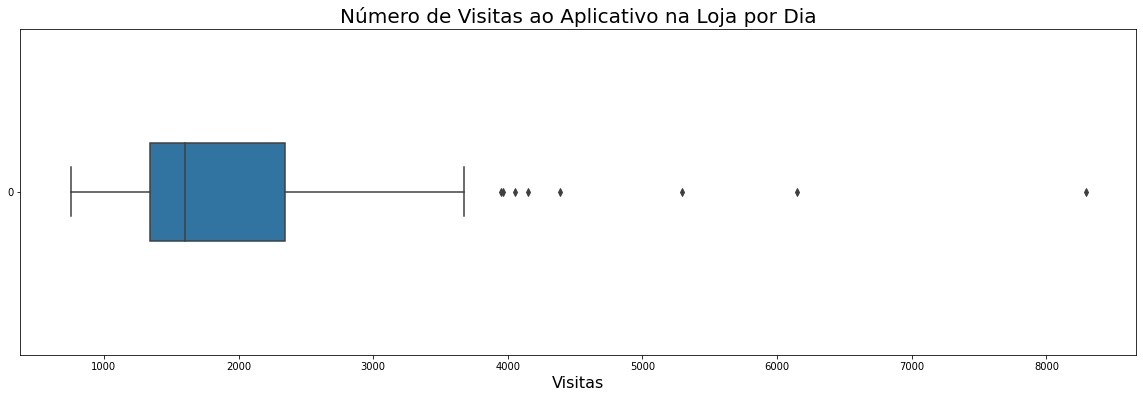

In [146]:
ax = sns.boxplot(data = df2_organico['Store Listing Visitors'], orient = 'h', width = 0.3)

ax.figure.set_size_inches(20, 6)
ax.set_title('Número de Visitas ao Aplicativo na Loja por Dia', fontsize=20)
ax.set_xlabel('Visitas', fontsize=16)
ax

#####R: Há a presença de possível outlier, entretanto não impactará na elaboração do modelo de machine learning pela baixa influência no resultado

####Distplot para a verificação da Distribuição Normal nos dados

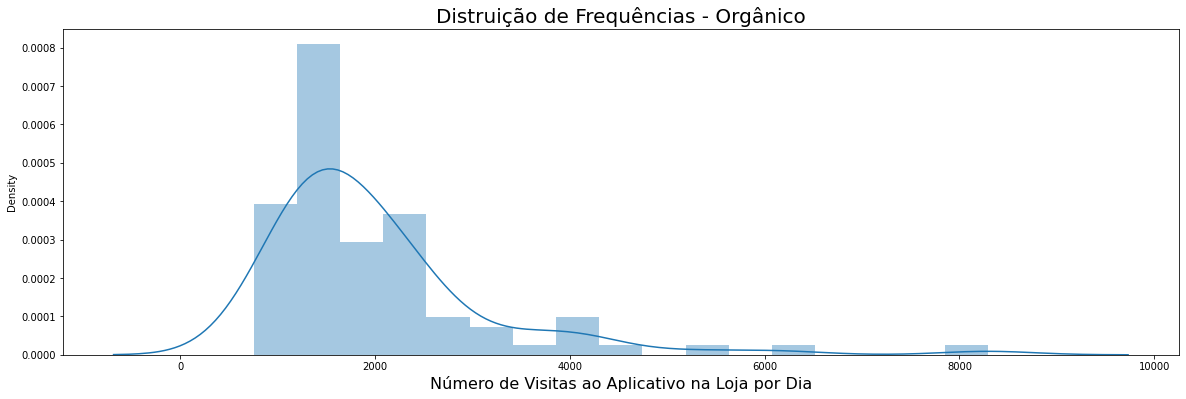

In [147]:
ax = sns.distplot(df2_organico['Store Listing Visitors'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distruição de Frequências - Orgânico', fontsize=20)
ax.set_xlabel('Número de Visitas ao Aplicativo na Loja por Dia', fontsize=16)
ax

#####R.: Não é o caso, havendo a necessidade de transformação logarítmica

####Pairplot para a visualização das informações da regressão linear

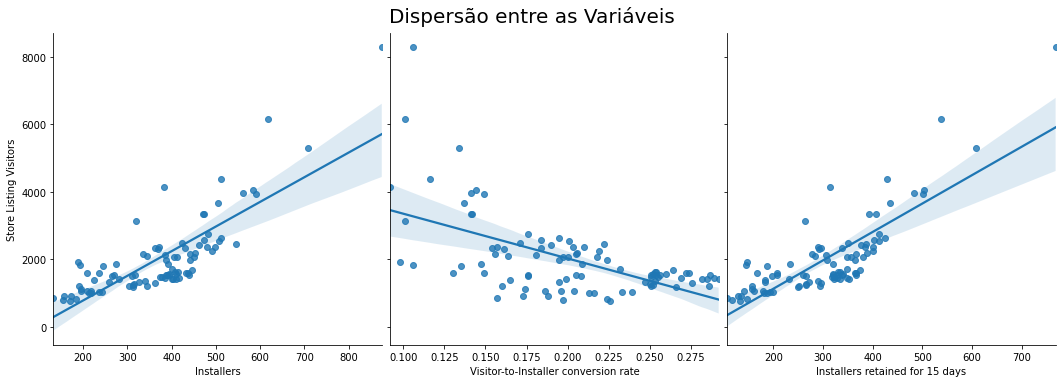

In [148]:
ax = sns.pairplot(df2_organico, y_vars = 'Store Listing Visitors', x_vars = ['Installers', 'Visitor-to-Installer conversion rate', 'Installers retained for 15 days'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

###Transformação Logarítmica

####Tranformação logarítmica e acréscimo das colunas das transformações no DataFrame

In [149]:
df2_organico['log_Store Listing Visitors'] = np.log(df2_organico['Store Listing Visitors'])
df2_organico['log_Installers'] = np.log(df2_organico['Installers'])
df2_organico['log_Visitor-to-Installer conversion rate'] = np.log(df2_organico['Visitor-to-Installer conversion rate'] + 1)
df2_organico['log_Installers retained for 15 days'] = np.log(df2_organico['Installers retained for 15 days'] + 1)

#####Visualização do DataFrame modificado

In [150]:
df2_organico

,Date,Package Name,Acquisition Channel,Store Listing Visitors,Installers,Visitor-to-Installer conversion rate,Installers retained for 1 day,Installer-to-1 day retention rate,Installers retained for 7 days,Installer-to-7 days retention rate,Installers retained for 15 days,Installer-to-15 days retention rate,Installers retained for 30 days,Installer-to-30 days retention rate,log_Store Listing Visitors,log_Installers,log_Visitor-to-Installer conversion rate,log_Installers retained for 15 days
0,2019-08-01 00:00:00,B4 Bank,Organic,1628,414,0.254,359,0.867,344,0.831,335,0.809,330,0.797,7.395108,6.025866,0.226338,5.817111
3,2019-08-02 00:00:00,B4 Bank,Organic,1610,407,0.253,354,0.870,338,0.830,330,0.811,322,0.791,7.383989,6.008813,0.225541,5.802118
7,2019-08-03 00:00:00,B4 Bank,Organic,1725,401,0.232,360,0.898,348,0.868,348,0.868,340,0.848,7.452982,5.993961,0.208639,5.855072
11,2019-08-04 00:00:00,B4 Bank,Organic,1579,410,0.260,365,0.890,350,0.854,341,0.832,330,0.805,7.364547,6.016157,0.231112,5.834811
15,2019-08-05 00:00:00,B4 Bank,Organic,1488,374,0.251,334,0.893,323,0.864,317,0.848,303,0.810,7.305188,5.924256,0.223943,5.762051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,2019-10-26 00:00:00,B4 Bank,Organic,2125,385,0.181,338,0.878,314,0.816,305,0.792,296,0.769,7.661527,5.953243,0.166362,5.723585
301,2019-10-27 00:00:00,B4 Bank,Organic,2069,413,0.200,376,0.910,366,0.886,357,0.864,348,0.843,7.634821,6.023448,0.182322,5.880533
305,2019-10-28 00:00:00,B4 Bank,Organic,1532,270,0.176,240,0.889,220,0.815,208,0.770,195,0.722,7.334329,5.598422,0.162119,5.342334
309,2019-10-29 00:00:00,B4 Bank,Organic,1326,258,0.195,207,0.802,193,0.748,184,0.713,175,0.678,7.189922,5.552960,0.178146,5.220356


####Verificação gráfica da distribuição normal dos dados transformados logaritmicamente

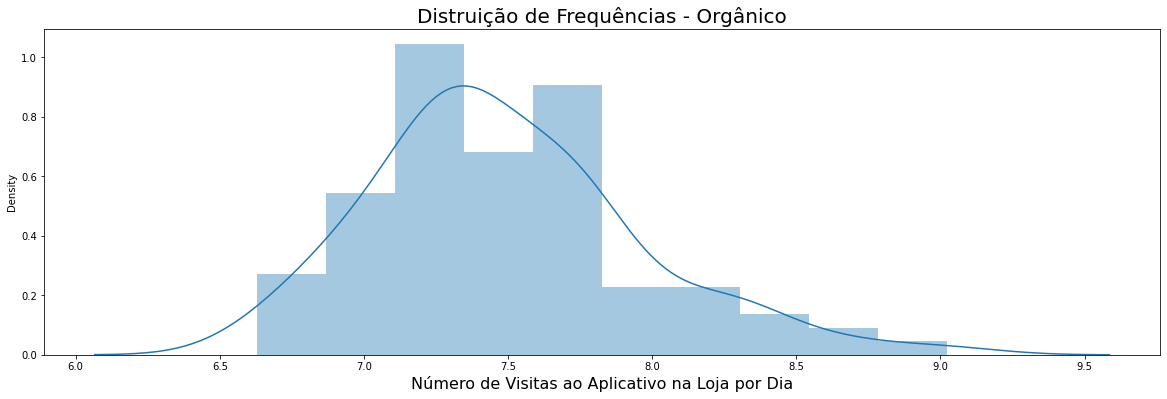

In [151]:
ax = sns.distplot(df2_organico['log_Store Listing Visitors'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distruição de Frequências - Orgânico', fontsize=20)
ax.set_xlabel('Número de Visitas ao Aplicativo na Loja por Dia', fontsize=16)
ax

####Verificação da regressão linear dos dados transformados logaritmicamente



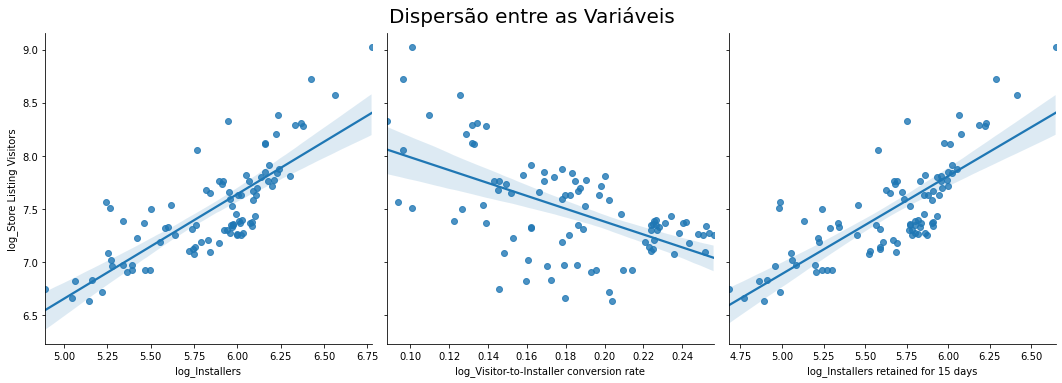

In [152]:
ax = sns.pairplot(df2_organico, y_vars = 'log_Store Listing Visitors', x_vars = ['log_Installers', 'log_Visitor-to-Installer conversion rate', 'log_Installers retained for 15 days'], height = 5, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

###Estimação de um modelo de regressão linear

#### Importação do train_test_split da biblioteca *scikit-learn*


In [153]:
from sklearn.model_selection import train_test_split

####Criação de uma Series para armazenar a variável dependente (y) e de um DataFrame para armazenar as variáveis explicativas (x)

In [154]:
y = df2_organico['log_Store Listing Visitors']
X = df2_organico[['log_Installers', 'log_Visitor-to-Installer conversion rate', 'log_Installers retained for 15 days']]

#### Criação dos datasets de treino e de teste

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

###Importação da biblioteca statsmodels

In [156]:
import statsmodels.api as sm

###Estimação do modelo com statsmodels

In [157]:
X_train_com_constante = sm.add_constant(X_train)
X_train_com_constante

,const,log_Installers,log_Visitor-to-Installer conversion rate,log_Installers retained for 15 days
120,1.0,5.389072,0.195567,5.241747
162,1.0,5.937536,0.227136,5.780744
70,1.0,5.739793,0.188966,5.587249
21,1.0,5.141664,0.203757,4.890349
232,1.0,6.089045,0.186480,5.908083
...,...,...,...,...
92,1.0,5.916202,0.145830,5.673323
90,1.0,5.891644,0.143234,5.693732
208,1.0,6.173786,0.184818,5.955837
50,1.0,5.755742,0.223144,5.587249


In [158]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

##Estimação do modelo com os dados de treino

###Importação da LinearRegression e metrics da biblioteca scikit-learn

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Instanciação da classe LinearRegression()


In [160]:
modelo = LinearRegression()

### Utilização do método fit() para estimar o modelo linear com os dados de TREINO

In [161]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###Criação do simulador

In [162]:
Installers = 400
Visitor_to_Installer_conversion_rate = 0.4
Installers_retained_for_15_days = 150
entrada = [[np.log(Installers), np.log(Visitor_to_Installer_conversion_rate + 1), np.log(Installers_retained_for_15_days + 1)]]

print('Para obtermos {0:.0f} usuários retidos por no mínimo 15 dias com {1:.0f} instalações e com uma taxa de conversão de {2:.3f}, será necessário {3:.0f} visualizações do aplicativo na loja'.format(Installers_retained_for_15_days, Installers, Visitor_to_Installer_conversion_rate, np.exp(modelo.predict(entrada)[0])))

Para obtermos 150 usuários retidos por no mínimo 15 dias com 400 instalações e com uma taxa de conversão de 0.400, será necessário 669 visualizações do aplicativo na loja
